<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [37]:
# YOUR CODE HERE
import pandas as pd


df = pd.read_csv("../dat/past.csv.gz")

past = df
past

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5550.000000,15.840000,15.840000,0.000000,1.333333,0.000000,...,0.000000,0.000000,0.000000,0.666667,0.333333,0.000000,0.000000,0,0.000000,1.000000
1,5647110,5.326529e+08,2.250000,1.500000,27556.500000,5.800000,5.565000,1.250000,0.250000,0.250000,...,0.250000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0,0.000000,1.000000
2,5790472,4.578109e+08,1.000000,1.000000,0.000000,6.272500,6.272500,0.250000,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0,0.000000,1.000000
3,5811598,4.612641e+08,1.500000,1.500000,131532.500000,5.560000,5.560000,0.250000,1.000000,0.250000,...,0.250000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0,0.250000,1.000000
4,5846363,5.157993e+08,1.875000,1.375000,11055.875000,4.086250,4.086250,0.500000,1.000000,0.250000,...,0.250000,0.375000,0.000000,0.125000,0.250000,0.250000,0.000000,1,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5610082,5.853313e+08,1.500000,1.000000,77.000000,0.790000,0.790000,0.500000,0.500000,0.000000,...,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4996,5770265,5.124349e+08,1.954545,1.363636,348649.090909,2.972727,2.972727,0.636364,0.681818,0.590909,...,0.272727,0.136364,0.045455,0.181818,0.409091,0.045455,0.090909,1,0.090909,1.045455
4997,5923106,4.427739e+08,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000
4998,5889691,6.104029e+08,2.000000,1.000000,766.000000,8.250000,8.250000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1.000000


<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [2]:
# YOUR CODE HERE

len(df[df["Purchased?"]==1])/len(df["Purchased?"])

0.3438

~34% actually purchased. Seems like there is a lot of window shopping although some do buy what they look at. Data is a bit skewed in the sense that non purchases are close to 2/3rds.

3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [3]:
# YOUR CODE HERE
# YOUR CODE HERE
X = df.drop(["product_id", "user_id"], axis=1)
y = X.pop("Purchased?")



In [4]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [5]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=5, whiten=True).fit(X_scaled)
X_reduced = pca.transform(X_scaled)

In [6]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [8]:
# YOUR CODE HERE
import numpy as np

np.set_printoptions(precision=2,suppress=True,floatmode='fixed')
print(pca.explained_variance_ratio_)

[0.10 0.09 0.07 0.05 0.04]


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [9]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [10]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

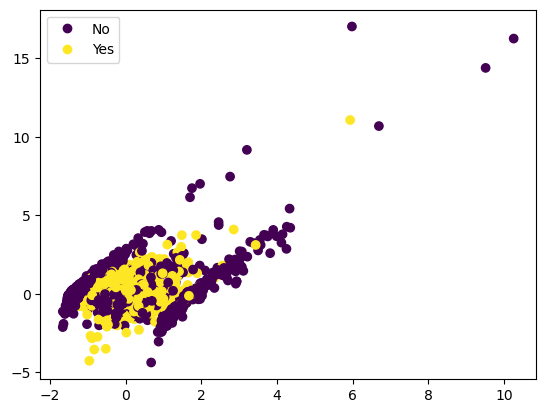

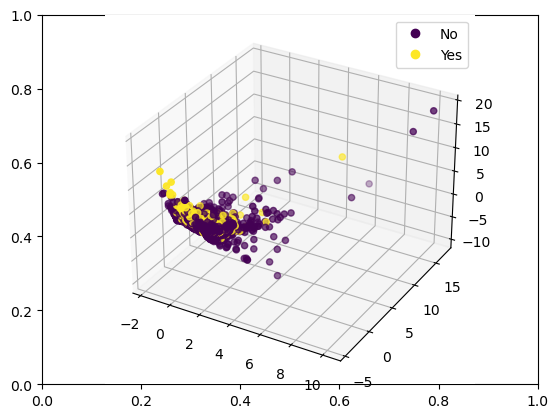

In [11]:
# YOUR CODE HERE
# YOUR CODE HERE
visualize_2pcs(X_reduced, y)
visualize_3pcs(X_reduced, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [12]:
# YOUR CODE HERE (imports!)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

def train(X, y, standardize = True) -> None:
    X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
    if standardize==True: 
        model = make_pipeline(StandardScaler(), LogisticRegression(class_weight="balanced"))
    else: 
        model = make_pipeline(LogisticRegression(class_weight="balanced"))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    # YOUR CODE HERE

Now apply the pipeline on the all the features `X` and review the performance

In [14]:
# YOUR CODE HERE
train(X, y, True)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [15]:
# YOUR CODE HERE
train(X_reduced, y, True)

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       649
           1       0.50      0.54      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.63      0.62      1000
weighted avg       0.66      0.65      0.65      1000



In [16]:
train(X, y, False)

              precision    recall  f1-score   support

           0       0.98      0.40      0.57       649
           1       0.47      0.99      0.64       351

    accuracy                           0.61      1000
   macro avg       0.73      0.70      0.61      1000
weighted avg       0.81      0.61      0.60      1000



In [17]:
train(X_reduced, y, False)

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       649
           1       0.50      0.54      0.52       351

    accuracy                           0.65      1000
   macro avg       0.62      0.63      0.62      1000
weighted avg       0.66      0.65      0.65      1000



8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    Training on the full feature set does give a slightly scores except for recall for class 1 when compared with thr reduces set. The advantage of the reduced set is that it has removed all unimportant or correlated features and hence faster to train. It is a judgement call if the difference (reduction) is acceptable or not
    
    As far as standardization is concerned, standardization didn't make a difference on the reduced set since it already is standardized. For the full set, standardization improves recall but reduces precision and f1 score for class 0 and for class 0 it reduced precision but improved recall and f1 score.

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [18]:
# YOUR CODE HERE
from sklearn.cluster import KMeans


2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [19]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=10).fit(X)
        inertias.append(kmeans.inertia_)
        # YOUR CODE HERE
        # YOUR CODE HERE
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

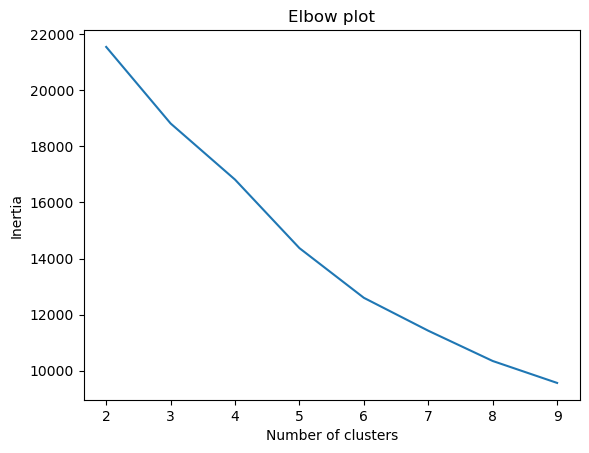

In [20]:
# YOUR CODE HERE
visualize_elbow(X_reduced, range(2, 10))

4. What are the disadvantage to use the Elbow method? 

    *YOUR ANSWER HERE*
    The elbow method is a bit subjective becuase it is a visual method. As an example, in the plot above it is not very obvious as to which cluster size to pick. 

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [21]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.19919967382453047
For n_clusters = 3 The average silhouette_score is : 0.21238428422148908
For n_clusters = 4 The average silhouette_score is : 0.21846259845030108
For n_clusters = 5 The average silhouette_score is : 0.2055016602111605
For n_clusters = 6 The average silhouette_score is : 0.20861307391519884
For n_clusters = 7 The average silhouette_score is : 0.2137422138377995
For n_clusters = 8 The average silhouette_score is : 0.21817268912132334

For n_clusters = 2 The average silhouette_score is : 0.1993991965168761
For n_clusters = 3 The average silhouette_score is : 0.238695770515221
For n_clusters = 4 The average silhouette_score is : 0.2056167817597997
For n_clusters = 5 The average silhouette_score is : 0.2110826283184243
For n_clusters = 6 The average silhouette_score is : 0.21432092425326524
For n_clusters = 7 The average silhouette_score is : 0.22120783849244052
For n_clusters = 8 The average silhouette_score is : 0.22169686869815522


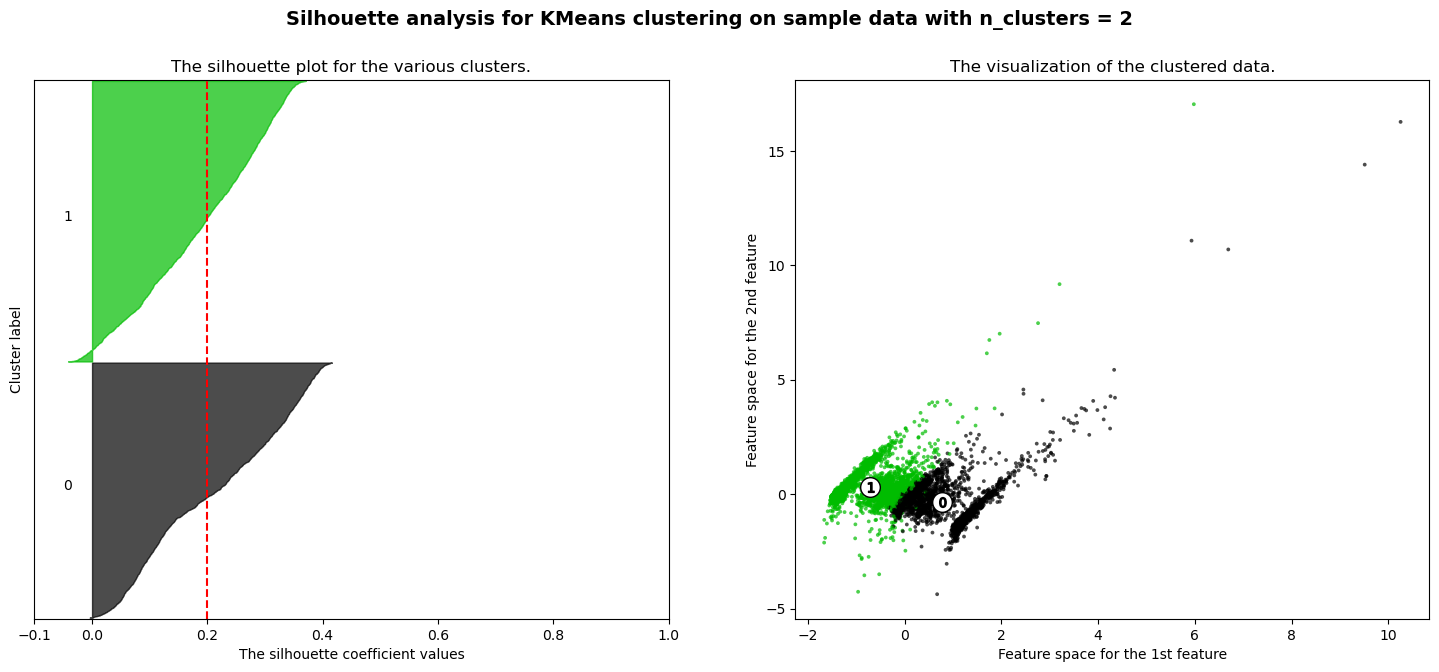

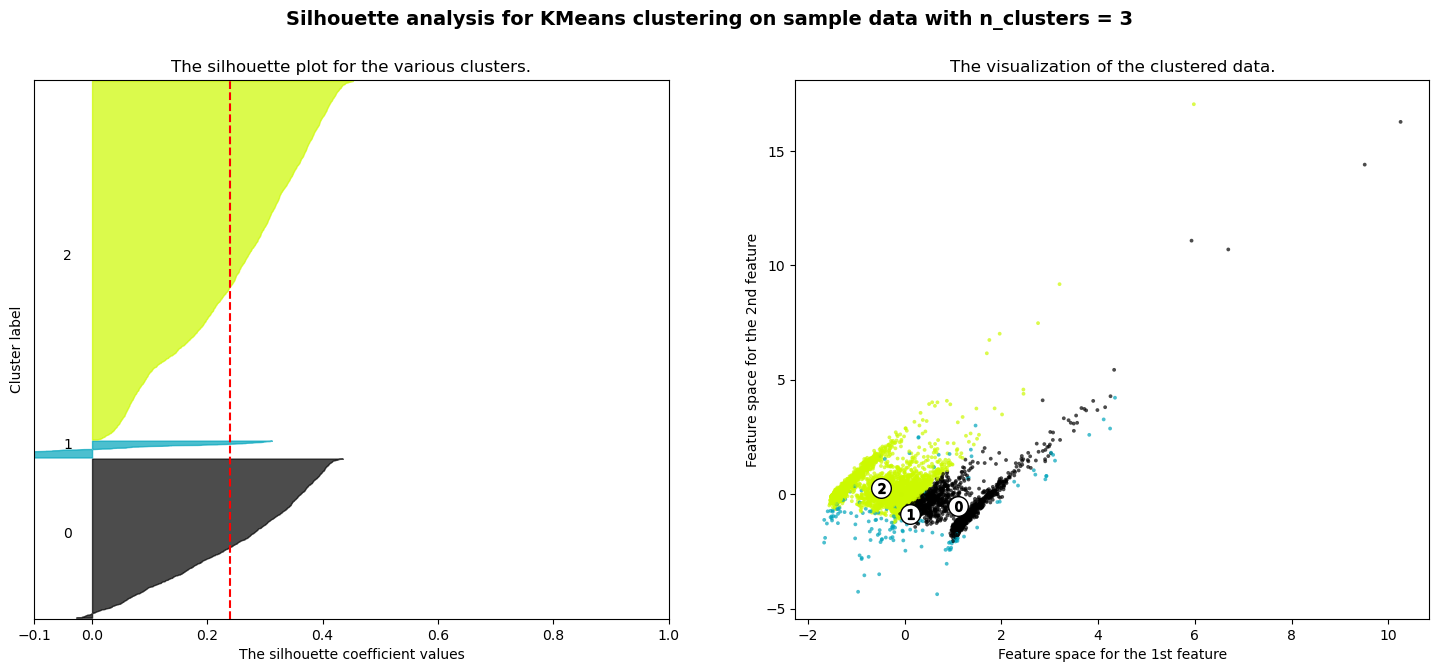

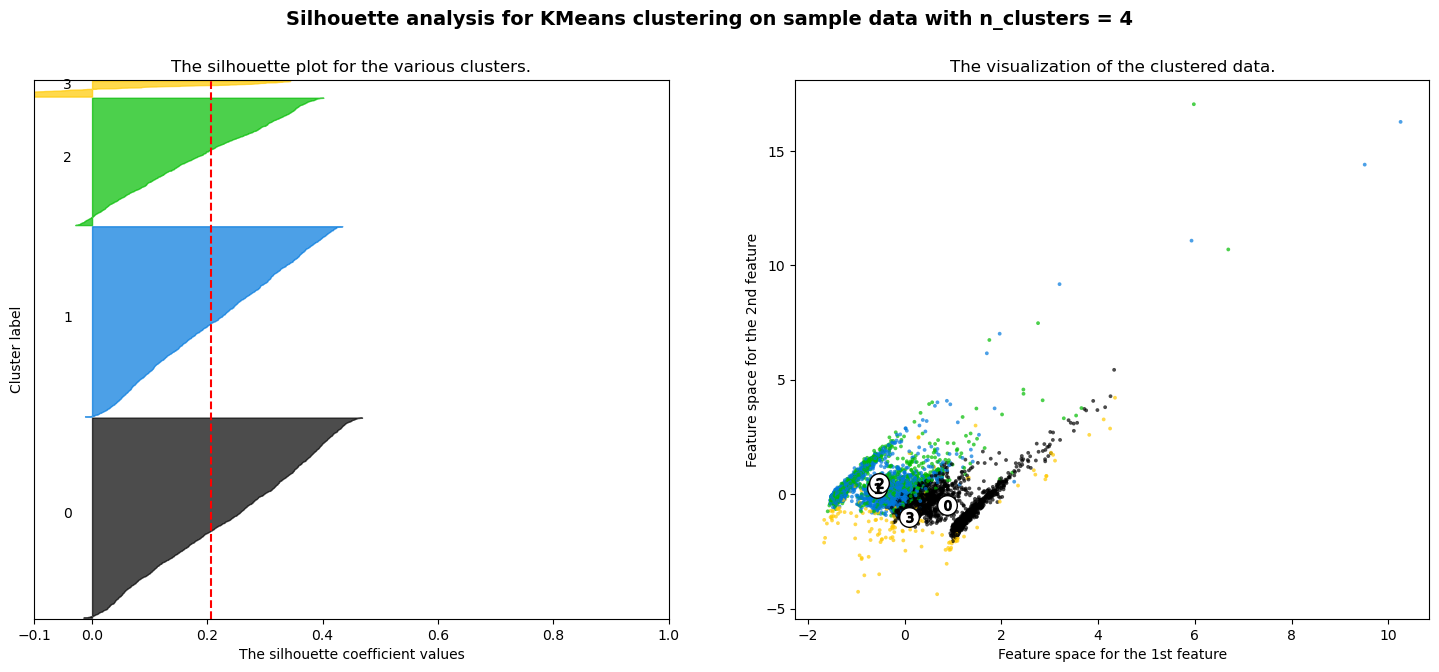

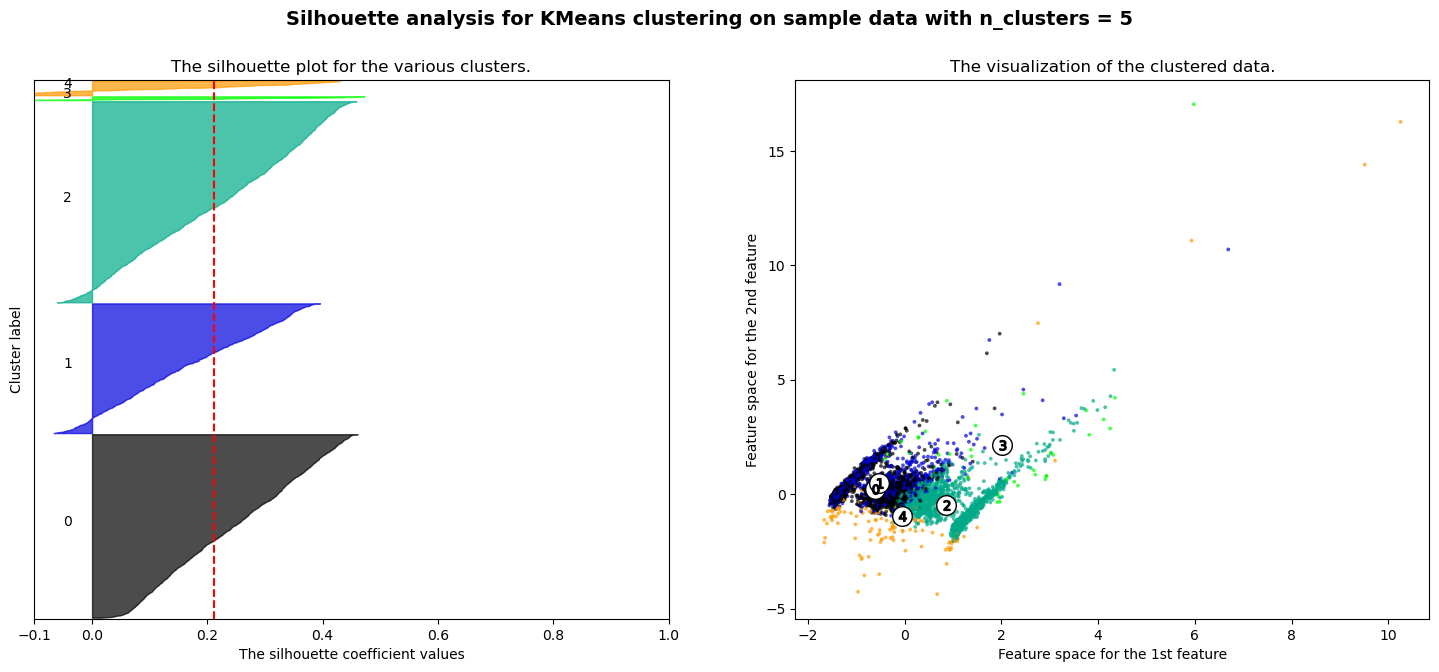

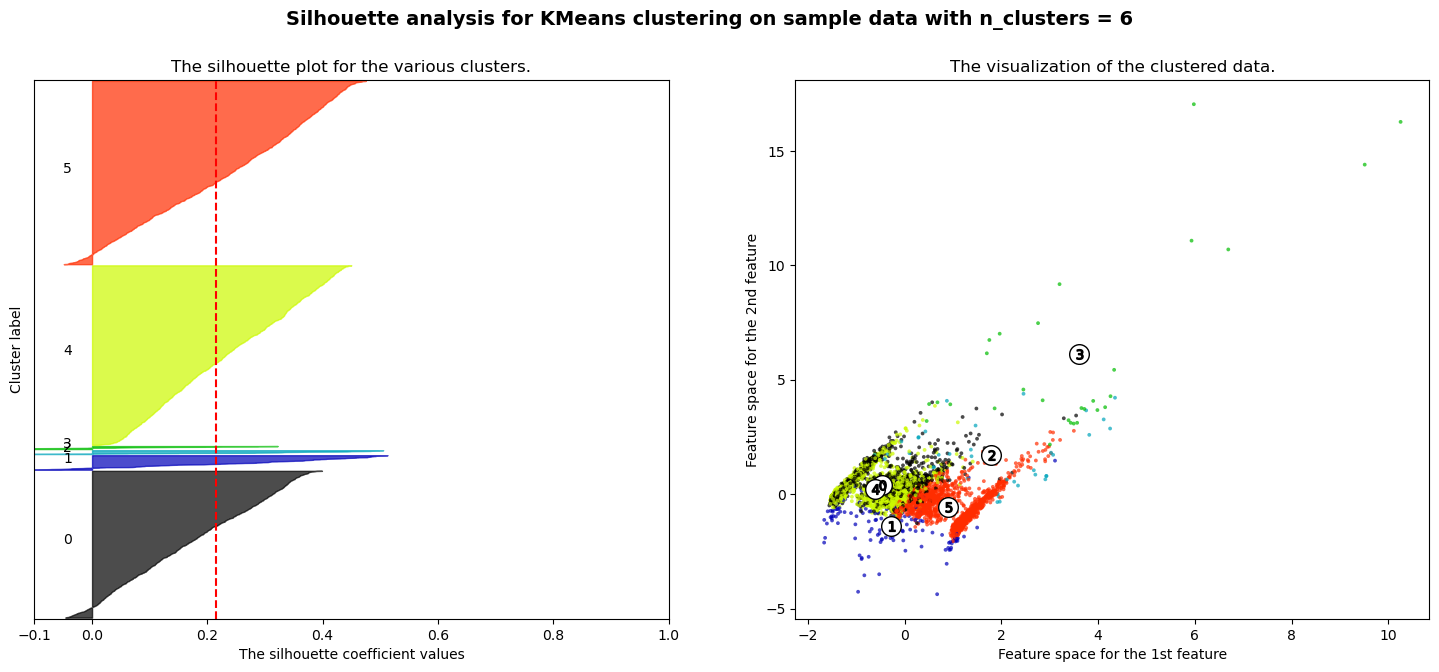

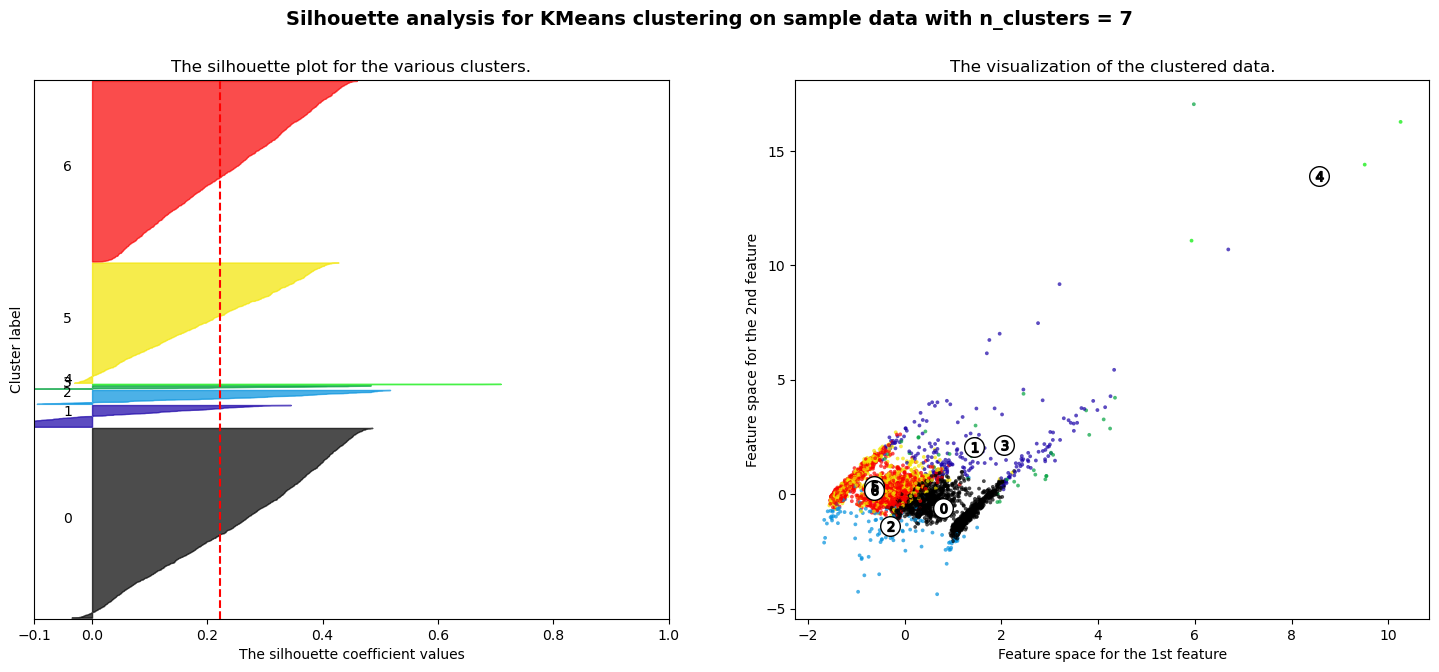

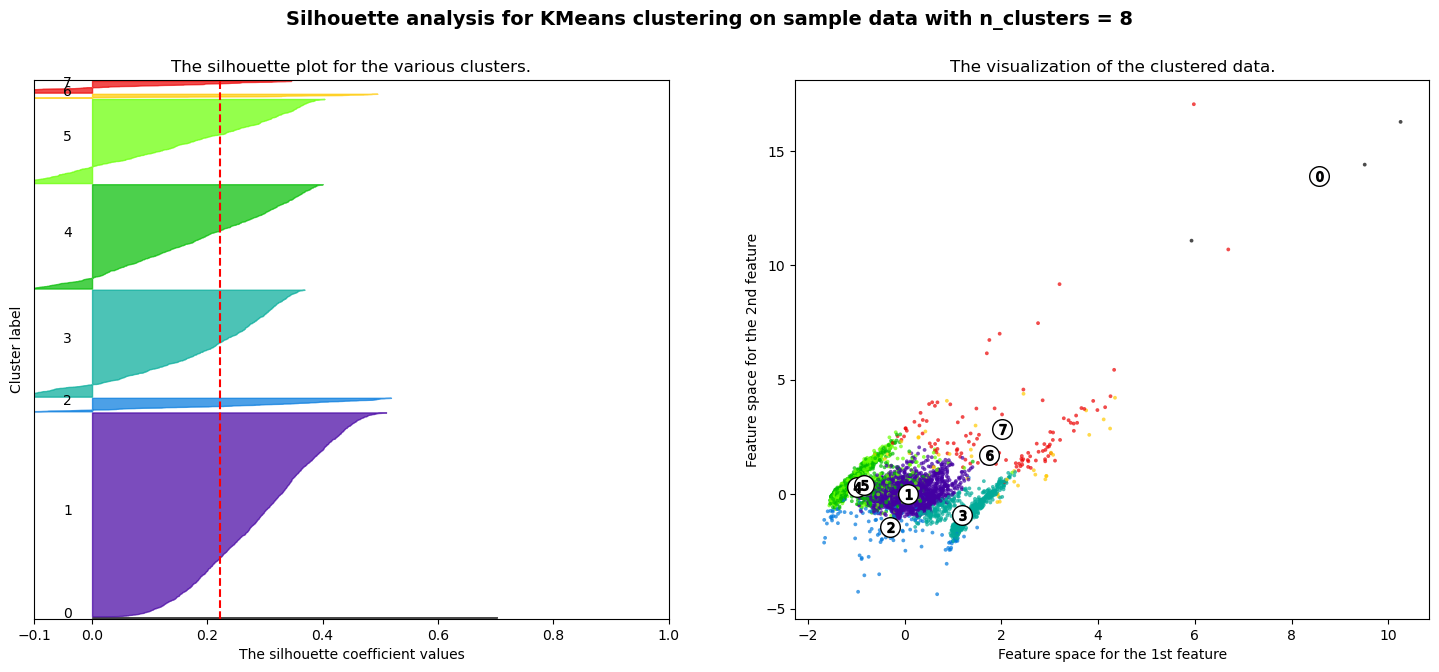

In [22]:
# YOUR CODE HERE

visualize_silhouette(8, X_reduced)


6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [78]:
# YOUR CODE HERE
km = KMeans(n_clusters=4)
km.fit(X_reduced)
y_km = km.predict(X_reduced)

7. What is the size of each cluster? 

In [99]:
# YOUR CODE HERE
from collections import Counter
counts = Counter(km.labels_)
print(counts)

Counter({0: 2520, 1: 2295, 3: 146, 2: 39})


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [100]:
# YOUR CODE HERE

past['cluster_pca'] = km.labels_
len(km.labels_)

5000

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

In [101]:
clusters = [past[past['cluster_pca'] == i] for i in counts.keys()]

In [84]:
past.groupby(['cluster_pca', 'Purchased?' ]).count()

product_id  user_id  NumOfEventsInJourney  \
cluster_pca Purchased?                                              
0           0                 1622     1622                  1622   
            1                  898      898                   898   
1           0                 1535     1535                  1535   
            1                  760      760                   760   
2           0                   37       37                    37   
            1                    2        2                     2   
3           0                   87       87                    87   
            1                   59       59                    59   

                        NumSessions  interactionTime  maxPrice  minPrice  \
cluster_pca Purchased?                                                     
0           0                  1622             1622      1622      1622   
            1                   898              898       898       898   
1           0                  1535             1535      1535      1535   
            1                   760              760       760       760   
2           0                    37               37        37        37   
            1                     2                2         2         2   
3           0                    87               87        87        87   
            1                    59               59        59        59   

                        NumCart  NumView  NumRemove  ...   Nov   Dec  \
cluster_pca Purchased?                               ...               
0           0              1622     1622       1622  ...  1622  1622   
            1               898      898        898  ...   898   898   
1           0              1535     1535       1535  ...  1535  1535   
            1               760      760        760  ...   760   760   
2           0                37       37         37  ...    37    37   
            1                 2        2          2  ...     2     2   
3           0                87       87         87  ...    87    87   
            1                59       59         59  ...    59    59   

                        Afternoon  Dawn  EarlyMorning  Evening  Morning  \
cluster_pca Purchased?                                                    
0           0                1622  1622          1622     1622     1622   
            1                 898   898           898      898      898   
1           0                1535  1535          1535     1535     1535   
            1                 760   760           760      760      760   
2           0                  37    37            37       37       37   
            1                   2     2             2        2        2   
3           0                  87    87            87       87       87   
            1                  59    59            59       59       59   

                        Night  Noon  Category  
cluster_pca Purchased?                         
0           0            1622  1622      1622  
            1             898   898       898  
1           0            1535  1535      1535  
            1             760   760       760  
2           0              37    37        37  
            1               2     2         2  
3           0              87    87        87  
            1              59    59        59  

[8 rows x 36 columns]

In [188]:
df_grpby_cl = past.groupby(['cluster_pca']).mean()
df_grpby_cl

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
cluster_pca,,,,,,,,,,,,,,,,,,,,,
0,5.544778e+06,5.150257e+08,1.937682,1.309305,195699.877650,5.657940,5.634976,0.551191,0.867060,0.412832,...,0.243033,0.206869,0.067286,0.164720,0.240441,0.173779,0.089442,0.356349,0.057463,1.138864
1,5.606589e+06,5.326012e+08,1.933446,1.322558,296134.179579,6.229949,6.197120,0.547685,0.877997,0.405735,...,0.090747,0.217476,0.064451,0.159199,0.250435,0.165387,0.082555,0.331155,0.060498,1.144571
2,5.858086e+06,4.943002e+08,3.557692,1.444444,896261.059829,5.088419,4.685256,1.074786,0.363248,2.111111,...,0.094017,0.318376,0.096154,0.136752,0.258547,0.089744,0.085470,0.051282,0.014957,1.452991
3,5.480871e+06,5.354865e+08,2.030368,1.672660,255966.989179,58.450759,58.399646,0.150055,1.741603,0.096751,...,0.173141,0.230975,0.056691,0.188971,0.200808,0.171578,0.065462,0.404110,0.085515,1.131818


<AxesSubplot: xlabel='cluster_pca'>

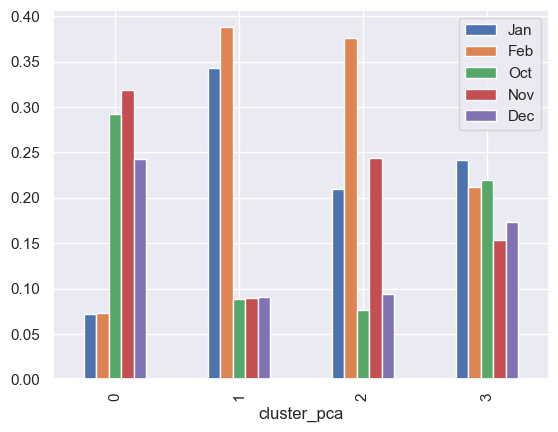

In [208]:

df_grpby_cl[['Jan','Feb','Oct','Nov','Dec']].plot.bar()

<AxesSubplot: xlabel='cluster_pca'>

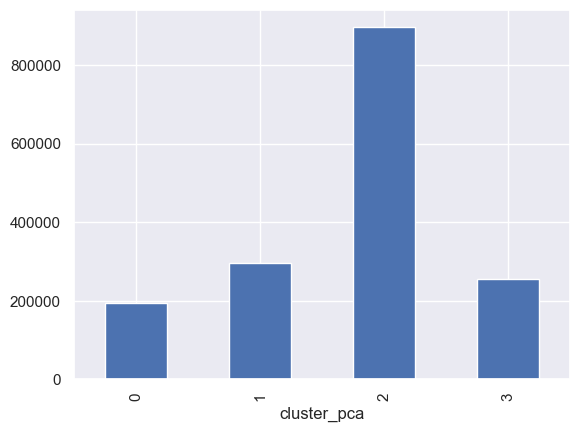

In [186]:
df_grpby_cl['interactionTime'].plot.bar()

<AxesSubplot: xlabel='cluster_pca'>

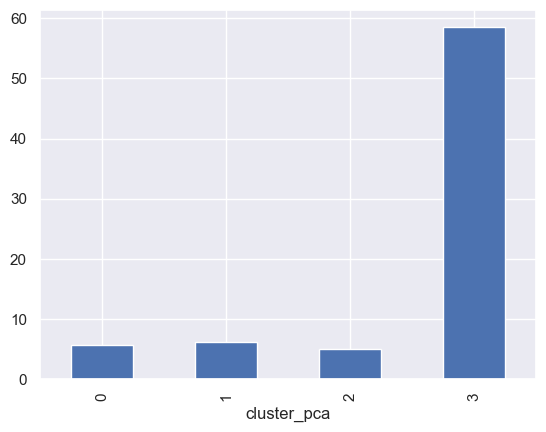

In [187]:
df_grpby_cl['maxPrice'].plot.bar()

    *YOUR ANSWER HERE*
    
    - Looks like clusters 0 & 1 have most of the data and clusters 2 and 3 have the rest. Obviously most of the purchases have been included in clusters 0 & 1. 

- Cluster 2 has the most interaction time but least purchases

- Cluster 3 has the maximum price

- One difference between Clusters 0 & 1 are the monthly purchases

Some interpretations could be that the more interaction time spent the less likely that thet are to purchase. It is also clear that the price does make a difference. The month seems to make a difference on the purchase. We could do more analysis and see what specific products were purchased monthly.

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

    *YOUR ANSWER HERE*
    
    

In [158]:
# YOUR CODE HERE
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0).fit(X_reduced)
counts_sc = Counter(sc.labels_)
print(counts_sc)

Counter({0: 4986, 1: 11, 2: 3})


In [160]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=4, assign_labels='cluster_qr', random_state=0).fit(X_reduced)
counts_sc = Counter(sc.labels_)
print(counts_sc)

Counter({0: 4986, 3: 8, 2: 4, 1: 2})


In [161]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=4, assign_labels='kmeans', random_state=0).fit(X_reduced)
counts_sc = Counter(sc.labels_)
print(counts_sc)

Counter({0: 4999, 1: 1})


/opt/homebrew/Caskroom/miniforge/base/envs/py39_12/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:379: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  est = KMeans(


11. Jot down recommendations or followup steps, detailing the reasons.

In [176]:
from sklearn.cluster import MiniBatchKMeans
mbkm = MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=10, max_iter=10).fit(X_reduced)
counts_mbkm = Counter(mbkm.labels_)
print(counts_mbkm)

Counter({3: 2288, 1: 1352, 2: 1044, 0: 316})


In [179]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.7, min_samples=10).fit(X_reduced)
labels = dbs.labels_
counts_dbs = Counter(labels)
print(counts_dbs)

Counter({0: 4503, -1: 481, 1: 16})


In [180]:

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 481


In [173]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=4).fit(X_reduced)
counts_brc = Counter(brc.labels_)
print(counts_brc)

Counter({2: 4878, 1: 54, 0: 40, 3: 28})


    *YOUR ANSWER HERE*
    Birch and Spectral clustering seem to be favoring one huge cluster with the rest going in another small cluster. So KMeans seems to be doing better.

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [130]:
# YOUR CODE HERE
new = pd.read_csv('../dat/new.csv.gz')

In [131]:
assert new.shape == (30091, 5)

In [132]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

        *YOUR ANSWER HERE*

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [133]:
# YOUR CODE HERE
np.intersect1d(np.array(past['product_id']), np.array(new['product_id']))

array([], dtype=int64)

Looks like there are no product ids that appear in both datasets

4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [134]:
# YOUR CODE HERE # ~.344
len(new[new["Purchased?"]==1])/len(new["Purchased?"])

0.3442557575354757

5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [135]:
new.columns

Index(['product_id', 'maxPrice', 'minPrice', 'Purchased?', 'Category'], dtype='object')

In [136]:
# YOUR CODE HERE
X = new.drop(columns=['product_id'])
y = X.pop('Purchased?')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [137]:
type(X_train)

pandas.core.frame.DataFrame

In [139]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

# assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
# assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [140]:
# YOUR CODE HERE
model = LogisticRegression(class_weight="balanced")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      3986
           1       0.80      0.50      0.61      2033

    accuracy                           0.79      6019
   macro avg       0.79      0.72      0.73      6019
weighted avg       0.79      0.79      0.77      6019



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [141]:
# YOUR CODE HERE
X = np.concatenate((X_train, X_test), axis=0)

In [144]:
X.shape

(30091, 3)

In [146]:
# assert X.shape == (35091, 3) Not sure why but my count is different
assert X.shape == (30091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [147]:
# YOUR CODE HERE
y = np.concatenate((y_train, np.ones(X_test.shape[0])*-1), axis=0)

In [148]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [150]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading
lpm = LabelSpreading(kernel='knn', alpha=0.01)
lpm.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [151]:
semi_sup_preds = lpm.predict(X_test) # YOUR CODE HERE

/opt/homebrew/Caskroom/miniforge/base/envs/py39_12/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LabelSpreading was fitted without feature names
  warnings.warn(


In [152]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [153]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3986
           1       0.86      0.68      0.76      2033

    accuracy                           0.85      6019
   macro avg       0.85      0.81      0.83      6019
weighted avg       0.85      0.85      0.85      6019



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      3986
           1       0.80      0.50      0.61      2033

    accuracy                           0.79      6019
   macro avg       0.79      0.72      0.73      6019
weighted avg       0.79      0.79      0.77      6019



    *YOUR ANSWER HERE*
    The label spreading model imnproved on the scores accross the board except for recall for class 0. The f1 score for class 1 is still low and could be improved.

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)